# logistic regression on random dataset

Logistic regression is a supervised machine learning algorithm widely used for binary classification tasks, such as identifying whether an email is spam or not and diagnosing diseases by assessing the presence or absence of specific conditions based on patient test results.

**Steps:**

1. Data Generation:
We use make_classification to create a synthetic dataset with 1000 samples, 10 features, and 2 classes.

2. Train-Test Split:
The dataset is split into training (70%) and testing (30%) sets using train_test_split.

3. Logistic Regression Model:
We create an instance of LogisticRegression and train the model on the training set.

4. Prediction:
Predictions are made on the test set.

5. Confusion Matrix:
The confusion matrix shows the number of correct and incorrect predictions for each class. It is visualized using ConfusionMatrixDisplay.

6. Interactive Element:
Using ipywidgets, we create a slider to adjust the threshold for classification. This lets you see how changing the threshold affects the confusion matrix and performance.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

In [3]:
# Generate a binary classification dataset
n_samples = 1200
n_features = 2
n_classes = 2


X, y = datasets.make_blobs(n_samples= n_samples, n_features= n_features, centers= n_classes, cluster_std=[4, 6],random_state=3)
X.shape, y.shape

((1200, 2), (1200,))

<Axes: >

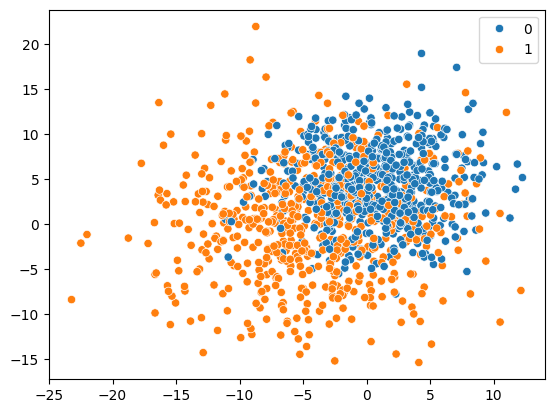

In [4]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=38)

# Function to train and visualize Logistic Regression model
def train_and_plot(C=1.0):
    # Initialize the Logistic Regression model with elastic net regularization
    model = LogisticRegression(C=C, random_state=38, penalty='elasticnet', solver='saga', l1_ratio=0.0001)
    model.fit(X_train, y_train)  # Fit the model on the training data

    # Predict labels for the test dataset
    y_pred = model.predict(X_test)

    # Calculate and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Set up the plot for the decision boundary
    plt.figure(figsize=(12, 5))
    plot_decision_boundary(model, X_test, y_test)  # Call helper function to plot the decision boundary
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

    # Display the confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Helper function to plot the decision boundary of the logistic regression model
def plot_decision_boundary(model, X, y):
    # Define the range for the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict classes across the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a contour plot for the decision boundary and overlay the data points
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Interactive widget to adjust regularization strength via a slider
interact(train_and_plot, C=FloatSlider(min=0.0001, max=5, step=0.001, value=1.0, description='Regularization C'))


interactive(children=(FloatSlider(value=1.0, description='Regularization C', max=5.0, min=0.0001, step=0.001),…

<function __main__.train_and_plot(C=1.0)>

This demonstrates an implementation of logistic regression, providing interactive controls to adjust the regularization strength and visualize its impact on the decision boundary and classification accuracy.

#### Key Components:

- **`train_test_split()`**: This function from `sklearn.model_selection` splits the dataset into training and testing sets, crucial for evaluating the model's performance on unseen data.

- **`LogisticRegression()`**: Initializes a logistic regression model. The `penalty='elasticnet'` parameter specifies using both L1 and L2 regularization. The `solver='saga'` is used because it supports elastic net. `l1_ratio` specifies the mixing ratio between L1 and L2.

- **`fit()`**: This method trains the logistic regression model on the training data, finding parameters that best fit the model according to the specified regularization.

- **`predict()`**: Used to make predictions on the test set, which are necessary to evaluate the model's performance and to plot the decision boundary.

- **`confusion_matrix()`** and **`ConfusionMatrixDisplay()`**: These functions calculate and visualize the confusion matrix, helping to understand the true positives, false positives, true negatives, and false negatives in the model's predictions.

- **`plot_decision_boundary()`**: A helper function that generates a mesh grid of points and predicts their labels to visualize the decision boundary. This helps to see how the model separates the classes in the feature space.

- **`interact()`** and **`FloatSlider()`**: Functions from `ipywidgets` used to create an interactive slider, allowing dynamic adjustment of the regularization strength parameter `C`. This interaction facilitates real-time exploration of how changes in regularization affect the model's behavior.

By adjusting the regularization strength (`C`), we can explore how logistic regression behaves under different levels of regularization, observing the balance between bias and variance.

The decision boundary visualization offers intuitive insights into the model's classification strategy, while the confusion matrix provides quantitative measures of the model's accuracy and errors.

## Multiclass Classification

In [8]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

# Generate synthetic data for multiclass classification
n_samples = 1200
n_features = 3
n_classes = 3

# Generate blobs for classification
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_classes, cluster_std=[5, 7, 2], random_state=3)
X

array([[ -7.13460298,  -9.29665053,  -6.55924832],
       [-10.57181804,  -4.51311531,  -6.45904461],
       [ -7.70884851,  -8.0432861 ,  12.46155122],
       ...,
       [ -0.86771898,   3.27323326,  -3.89463644],
       [  5.14320717,   5.51783009, -12.88739796],
       [ -4.2720672 ,   4.78737969,  -4.21246303]])

In [9]:
import plotly.express as px

df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3'])
df['Class'] = y.astype(str)

# Plotting
fig = px.scatter_3d(df, x='Feature 1', y='Feature 2', z='Feature 3', color='Class',
                    color_continuous_scale=px.colors.qualitative.Bold)
fig.update_layout(title='3D Scatter Plot of Synthetic Data',
                  scene=dict(xaxis_title='Feature 1',
                             yaxis_title='Feature 2',
                             zaxis_title='Feature 3'),
                  legend_title="Class")
fig.show()


In [10]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=38)

# Function to train and visualize Logistic Regression model
def train_and_plot(C=1.0):
    # Create a Logistic Regression model with multinomial option for multiclass and L-BFGS solver
    model = LogisticRegression(C=C, random_state=42, multi_class='multinomial', solver='lbfgs')
    model.fit(X_train, y_train)  # Fit the model on the training data

    # Predict on the testing data
    y_pred = model.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))

    # Display the confusion matrix
    plt.figure(figsize=(8, 8))
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Interactive widget to adjust the regularization strength
interact(train_and_plot, C=FloatSlider(min=0.01, max=5, step=0.001, value=1, description='Regularization C'))


interactive(children=(FloatSlider(value=1.0, description='Regularization C', max=5.0, min=0.01, step=0.001), O…

<function __main__.train_and_plot(C=1.0)>

### Logistic Regression for Multiclass Classification

This demonstrates the application of logistic regression to a synthetic multiclass classification problem. It includes an interactive component to dynamically adjust the regularization strength and view its effects on model performance through the confusion matrix.

#### Key components:

- **`make_blobs()`**: From `sklearn.datasets`, this function generates isotropic Gaussian blobs for clustering, which can be used for generating a classification dataset. Parameters such as `n_samples`, `n_features`, `centers`, and `cluster_std` allow for customization of the dataset's complexity and separability.

- **`train_test_split()`**: This function from `sklearn.model_selection` is used to divide the dataset into training and testing sets, ensuring that both the model is both trained and validated on different subsets of the data.

- **`LogisticRegression()`**: Part of `sklearn.linear_model`, it is used here to create a logistic regression model suitable for multiclass classification by setting `multi_class='multinomial'`. The `C` parameter controls the strength of the regularization, influencing the complexity of the model.

### Practical Insights

Using this, we can dynamically adjust the regularization strength of a logistic regression model and instantly see the impact on the model's performance, particularly how well the model generalizes to unseen data as visualized by the confusion matrix.
